In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import drive
from google.colab import files

In [9]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Path to model in Google Drive
drive_model_path = '/content/drive/MyDrive/Machine Learning/Model Final .keras/Potato.keras'

In [16]:
# Load the .keras model
model = tf.keras.models.load_model(drive_model_path)

In [18]:
# Functions for loading and processing images
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = load_img(img_path, target_size=target_size)
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis("off")
    plt.show()
    img_array = img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

In [19]:
# Definition of class name map
class_names = {
    0: "Potato_Late_Blight",
    1: "Potato_Healthy",
    2: "Potato_Early_Blight"
}

# Function to predict image by class name
def predict_image_with_keras(model, img_path):
    preprocessed_image = load_and_preprocess_image(img_path)
    predictions = model.predict(preprocessed_image)[0]
    print(f"Predictions shape: {predictions.shape}")

    # Displays the probability for each class
    for i, prob in enumerate(predictions):
        if i in class_names:
            print(f"{class_names[i]}: {prob:.4f}")

    predicted_class = np.argmax(predictions)
    if predicted_class in class_names:
        print(f"\nPredicted Class: {class_names[predicted_class]}")

Silakan unggah gambar untuk diprediksi.


Saving Testing buat model Kentang 1.jpg to Testing buat model Kentang 1.jpg

Predicting for image: Testing buat model Kentang 1.jpg


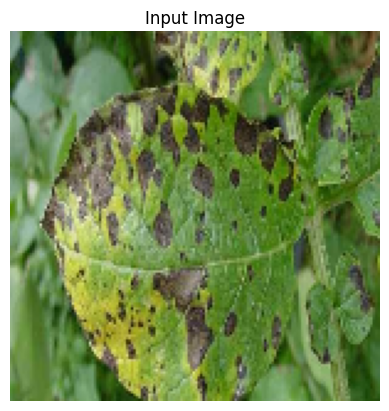

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predictions shape: (3,)
Potato_Late_Blight: 0.9813
Potato_Healthy: 0.0053
Potato_Early_Blight: 0.0134

Predicted Class: Potato_Late_Blight


In [21]:
# Input from user
print("Silakan unggah gambar untuk diprediksi.")
uploaded = files.upload()

# Make predictions on each uploaded image
for filename in uploaded.keys():
    print(f"\nPredicting for image: {filename}")
    predict_image_with_keras(model, filename)